**ALGORITMO GENÉTICO**       

La **función a minimizar** es: f = (x1^2 + x2 -11)^2 + (x1 + x2^2 -7)^2;

**Rango de valores:** 0<=x1,x2<=6;
**Número de individuos iniciales:** 20;
**Resolución =** 0.006;


Integrantes:

Yeison Idarraga Chavarria

Juan Camilo Agudelo Aquite

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [151]:
xu = 6;             #Límite inferior
xl = 0;             #Límite superior
res = 0.006;        #Resolución
tamanoPobla = 20;   #Tamaño de la Población

In [152]:
# Calcular el número de bits (q) a utilizar para representar cada variable, con una resolución de 0.006 en el intervalo (0,6):

q = np.ceil(np.log2(((xu - xl)/(res))+1))
print(q) # Cantidad de bits

10.0


In [153]:
def randPopulationPlantilla(xu,xl,tamanoPobla,q):
  #binPop: población de números binarios
  #decodedV: números binarios en decimal
  #r: valores en decimal de las variables x1 y x2;

  decodedV = np.random.randint(0,(2**q)-1, size=(tamanoPobla,1)) #Se crea una matriz de valores enteros aleatorios entre 0 y (2^q)-1

  binPop = np.zeros((tamanoPobla,int(q)))
  cont = 0

  #Ciclo para crear matriz de valores binarios
  for i in range(decodedV.shape[0]):
    binValue = format(decodedV[i,0], '#012b').replace("0b", "")
    temp = list(map(int, [*binValue]))
    binPop[cont,:] = temp
    cont+=1

  #Valores en decimal de las variables x1 y x2
  r = ((xu-xl)/((2**q)-1))*decodedV

  return(binPop,decodedV,r)

In [154]:
#Inicialización de la Población de Individuos
binPopx1, decodedVx1, rx1 = randPopulationPlantilla(xu, xl, tamanoPobla, q)
# print('binPopx1:',binPopx1.shape) # 20x10
binPopx2, decodedVx2, rx2 = randPopulationPlantilla(xu, xl, tamanoPobla, q)
# print('binPopx2',binPopx2.shape) # 20x10

In [155]:
#Función a minimizar


In [156]:
#Cálculo de la Función Fitness
def Fitness(rx1, rx2):
  #Se evaluan los rx1 y rx2 en la función pincipal
  f = np.square((np.square(rx1) + rx2 -11)) + np.square((rx1 + np.square(rx2) -7));
  Fit = 1 / (f + 1) #Se calcula con el inverso debido a que el ejercicio pide minimizar la función

  return (Fit, f)

# Fit, f = Fitness(rx1, rx2);
# print('Fit:', Fit.shape)
# print('f:', f.shape)

In [157]:
#Cálculo de la Reproducción
def Reproduccion(Fit,binPopx1,binPopx2):

  #Completar:

  #Probabilidades:
  P = Fit / np.sum(Fit)#20x1
  # print('P:', P.shape)

  #Probabilidad Acumulada
  PA = np.zeros((tamanoPobla,1))
  PA[0,0] = P[0,0]
  for i in range(tamanoPobla -1):
    PA[i+1,0] = PA[i,0] + P[i+1,0]
  # print('PA:', PA.shape) # 20x1

  #Rango Probabilidades
  RP = np.zeros((tamanoPobla,2))
  RP[0,0] = 0
  RP[0,1] = PA[0,0]

  for i in range(tamanoPobla -1):
    RP[i+1,0] = RP[i,1]
    RP[i+1,1] = PA[i+1,0]

  # print('RP:', RP.shape) # 20x2

  #Metodo Ruleta no genera la Matriz de Resproducción
  MR = np.zeros((tamanoPobla, 20)) # 20x20 Cantidad de filas de RP y la cantidad de columnas es la suma de cantidad de bits de cada matriz de binarios
  for i in range(tamanoPobla):
    k = random.random() #Esta función genera valores solo entre 0 y 1
    # print('k:', k)
    for j in range(tamanoPobla):
      if k >= RP[j,0] and k <= RP[j,1]:
        # print('pisicion:', j)
        MR[j,:] = np.concatenate((binPopx1[j,:], binPopx2[j,:]))# Se concatenan ambos vectores binarios

  return (MR)

In [158]:
#Cálculo de Crossover
def Crossover(MR):

  MC = np.copy(MR) # 20x20
  cantidadCrossovers = int(20 * 0.6) # 60% de los datos, para no afectarlos todos los de MR

  # Iterar de 2 en 2 hasta el límite superior
  for i in range(0, cantidadCrossovers, 2):
      k = np.random.randint(1, 20)
      #Crear vectores padres con los datos de MC
      padre1 = MC[i,:]
      padre2 = MC[i+1,:]

      #Crear vectores hijos basandonos en los vectores padres
      #Recordar que k se toma como un divisor cada vector padre
      #Por ende, cada vector hijo esta compuesto de ambos padres
      hijo1 = np.concatenate((padre1[:k-1], padre2[k-1:]))
      hijo2 = np.concatenate((padre2[:k-1], padre1[k-1:]))

      #Ahora actualizamos la matriz Crossover con los nuevos hijos
      MC[i,:] = hijo1;
      MC[i+1,:] = hijo2;
  return (MC)

In [159]:
#Cálculo de la Mutación
def Mutacion(MC):

  MM = np.copy(MC) # 20x20

  #En el ciclo vamos a mutar algunos valores de la matriz
  #dependiendo de una número aleatorio
  #Tener en cuenta que si el número aleatorio en mayor o igual a 0.5, no se realiza la mutación a la fila seleccionada.
  for i in range(tamanoPobla):
    k = np.random.random()
    if k < 0.5: #Aplicamos Probabilidad de la moneda
      k2 = np.random.randint(1, 20)
      if MM[i,k2] == 0:
        MM[i,k2] = 1
      elif MM[i,k2] == 1:
        MM[i,k2] = 0

  return (MM)

In [160]:
#Paso Intermedio

def MM2IntmdVal(MM):
  binPopx1 = MM[:,0:int(q)]
  binPopx2 = MM[:,int(q):]


  for i in range(tamanoPobla):
    binValX1 = binPopx1[i,:].astype(int)
    binValX2 = binPopx2[i,:].astype(int)

    binValX1Str = (np.array_str(binValX1)).replace(' ','')[1:-1]
    binValX2Str = (np.array_str(binValX2)).replace(' ','')[1:-1]

    decodX1 = int(binValX1Str,2)
    decodX2 = int(binValX2Str,2)

    rx1[i,0] = ((xu-xl)/((2**q)-1))*decodX1
    rx2[i,0] = ((xu-xl)/((2**q)-1))*decodX2

  return(binPopx1,binPopx2,rx1,rx2)


El valor de x1 que minimiza la función es:  [1.50146628]
El valor de x2 que minimiza la función es:  [0.93841642]


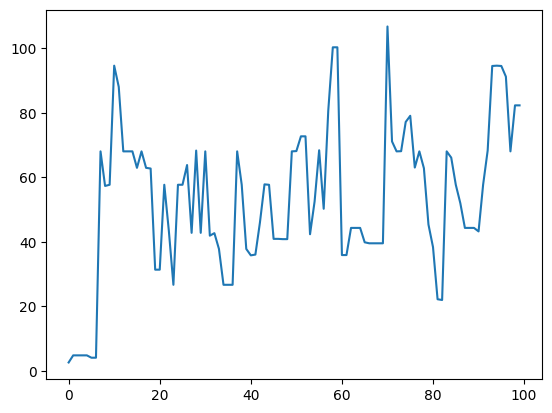

In [161]:
#Definicion Parámetro Iniciales del problema:

xu = 6;             #Límite inferior
xl = 0;             #Límite superior
res = 0.006;        #Resolución
tamanoPobla = 20;   #Tamaño de la Población

NumIteraciones = 100
f_history = np.zeros((NumIteraciones,1))

# Calcule el número de bits (q) a utilizar para representar cada variable, con una resolución de 0.006 en el intervalo (0,6):
q = np.ceil(np.log2(((xu - xl)/(res))+1))

#Inicialización de la Población de Individuos
binPopx1,decodedVx1,rx1 = randPopulationPlantilla(xu,xl,tamanoPobla,q)
binPopx2,decodedVx2,rx2 = randPopulationPlantilla(xu,xl,tamanoPobla,q)

for l in range(NumIteraciones):
  Fit,f = Fitness(rx1,rx2)
  f_history[l,0] = min(f)
  MR = Reproduccion(Fit,binPopx1,binPopx2)
  MC = Crossover(MR)
  MM = Mutacion(MC)
  (binPopx1,binPopx2,rx1,rx2) = MM2IntmdVal(MM)

Fit,f = Fitness(rx1,rx2)
posMin = np.argmin(f)
print("El valor de x1 que minimiza la función es: ", rx1[int(posMin)])
print("El valor de x2 que minimiza la función es: ", rx2[int(posMin)])
plt.plot(f_history)